![AutoSolvate](logo.png)


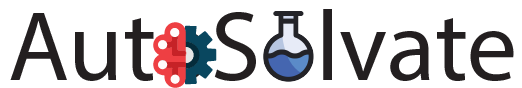

#### Automated workflow for setting up explicit solvent quantum chemistry calculations for molecules.

Since, we are running terminal commands in Jupyter Notebook, we have to prefix `!` before all command line arguments. In the python `Python 3.8 (AUTOSOLVATE)` kernel, `autosolvate` is installed as a bash command. Users can use `conda run -n AUTOSOLVATE autosolvate` command to run `autosolvate`

## First change the directory to your directory

In [1]:
from ipywidgets import Label, Layout, Button, Box, HBox, VBox, Checkbox, FloatText, Text, Dropdown, Output
from IPython.display import display, clear_output
from hublib.ui import FileUpload, Download,PathSelector
import imolecule

<IPython.core.display.Javascript object>

In [2]:
import os,shutil
user=os.environ["USER"]
os.chdir(f"/home/nanohub/{user}")
# We have to specify the GAMESS version.
os.environ["GAMESS_VERSION"]="2017"

## Load GAMESS module on NanoHub

In [3]:
import hublib.use
%use gamess-20170420

Checking if the current directory is the user's directory

In [4]:
os.getcwd()

'/home/nanohub/rgadde3'

## Select input File and Change the Current working directory

Ask user to upload file. Also, the current working directory is the user's home directory. Change the directory to the location where .xyz file is located

In [5]:
file_name=''
file_path=''
sim_dir=''
def check_if_directory(w,name):
    clear_output()
    global file_name,file_path,sim_dir
    file_name = os.path.basename(w.list()[0])
    file_path = os.path.abspath(w.list()[0])
    tmpdir = os.path.abspath(os.path.dirname(w.list()[0]))
    print(file_name,file_path,tmpdir)
    
    if not file_name.endswith(".xyz"):
        print("Invalid file type. Only '.xyz' files are accepted")
        return
    print(file_name)
    sim_dir = os.path.join(f"/home/nanohub/{user}",file_name.split('.')[0])
    if os.path.exists(sim_dir):
        shutil.rmtree(sim_dir)
    os.mkdir(sim_dir)
    shutil.copy(file_path,sim_dir)
    os.chdir(sim_dir)
    imolecule.draw(os.path.join(sim_dir,file_name),size=(1000, 300))


If there is any error in upload simply restart the kernel

In [6]:
DIRECTORY = FileUpload('Select Input Directory','Select',cb=check_if_directory)
display(DIRECTORY.input)

naphthalene_neutral.xyz /home/nanohub/rgadde3/tmpdir/naphthalene_neutral.xyz /home/nanohub/rgadde3/tmpdir
naphthalene_neutral.xyz


Check if `file_name` is updated

In [7]:
file_name,file_path

('naphthalene_neutral.xyz',
 '/home/nanohub/rgadde3/tmpdir/naphthalene_neutral.xyz')

In [ ]:
os.getcwd()

## STEP 1: Solvate box and MD parameter generation

## Command for Step 1 with BCC

In [9]:
!conda run -n AUTOSOLVATE autosolvate boxgen -m {file_name} -g "bcc" -c 0 -u 1


Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Info: Total number of electrons: 68; net charge: 0

Running: /apps/share64/debian10/anaconda/anaconda-7/envs/AUTOSOLVATE/bin/sqm -O -i sqm.in -o sqm.out

AutoSolvate is starting in command line mode!
Running the module to generate solvent box and force field parameters.
Main/solutexyz naphthalene_neutral.xyz
Chargemethod: bcc
Charge: 0
Spinmultiplicity: 1
['echo', '$AMBERHO

## Command for Step 1 with RESP

Please make sure to delete `resp_scr` directory before running the step-1 command

In [11]:
if os.path.exists(os.path.join(os.getcwd(),'resp_scr')):
    shutil.rmtree(os.path.join(os.getcwd(),'resp_scr'))

In [12]:
!conda run -n AUTOSOLVATE autosolvate boxgen -m {file_name} -d "/apps/share64/debian10/gamess/gamess-20170420/bin" -q "gamess" -g "resp" -c 1 -u 2


Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.





Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for ac File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences 

## Step 2: MD automation

In [ ]:
!conda run -n AUTOSOLVATE autosolvate mdrun -f water_solvated -i 100 -m 100 -n 100 -l 0 -o 0 -s 0 -v 0 -b 100

## Step 3: Microsolvated cluster extraction

In [ ]:
!conda run -n AUTOSOLVATE autosolvate clustergen -f water_solvated.prmtop -t water_solvated-mmnpt.netcdf -a 0 -i 10

## Visualize the Output

In [ ]:
 imolecule.draw("./water_solvated-cutoutn-0.xyz",size=(600, 600), camera_type="orthographic")